<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1--加载数据集" data-toc-modified-id="1--加载数据集-1">1  加载数据集</a></span><ul class="toc-item"><li><span><a href="#1.1--加载训练集和测试集" data-toc-modified-id="1.1--加载训练集和测试集-1.1">1.1  加载训练集和测试集</a></span></li><li><span><a href="#1.2-认识数据集" data-toc-modified-id="1.2-认识数据集-1.2">1.2 认识数据集</a></span><ul class="toc-item"><li><span><a href="#取第一张图片，测试Resize效果" data-toc-modified-id="取第一张图片，测试Resize效果-1.2.1">取第一张图片，测试Resize效果</a></span></li></ul></li><li><span><a href="#1.2-增加数据增强" data-toc-modified-id="1.2-增加数据增强-1.3">1.2 增加数据增强</a></span></li><li><span><a href="#1.3-重新加载" data-toc-modified-id="1.3-重新加载-1.4">1.3 重新加载</a></span></li><li><span><a href="#1.4-分批打包数据集" data-toc-modified-id="1.4-分批打包数据集-1.5">1.4 分批打包数据集</a></span></li></ul></li><li><span><a href="#2-GoogleNet" data-toc-modified-id="2-GoogleNet-2">2 GoogleNet</a></span><ul class="toc-item"><li><span><a href="#2.1--建模" data-toc-modified-id="2.1--建模-2.1">2.1  建模</a></span><ul class="toc-item"><li><span><a href="#2.1.1-加载GoogleNet预训练模型" data-toc-modified-id="2.1.1-加载GoogleNet预训练模型-2.1.1">2.1.1 加载GoogleNet预训练模型</a></span></li><li><span><a href="#2.1.2-固定卷积层" data-toc-modified-id="2.1.2-固定卷积层-2.1.2">2.1.2 固定卷积层</a></span></li><li><span><a href="#2.1.3-修改全连接层" data-toc-modified-id="2.1.3-修改全连接层-2.1.3">2.1.3 修改全连接层</a></span></li></ul></li><li><span><a href="#2.2--编译模型" data-toc-modified-id="2.2--编译模型-2.2">2.2  编译模型</a></span></li><li><span><a href="#2.3--训练" data-toc-modified-id="2.3--训练-2.3">2.3  训练</a></span></li><li><span><a href="#2.4-训练模型" data-toc-modified-id="2.4-训练模型-2.4">2.4 训练模型</a></span><ul class="toc-item"><li><span><a href="#2.4.1-循环训练" data-toc-modified-id="2.4.1-循环训练-2.4.1">2.4.1 循环训练</a></span></li><li><span><a href="#2.4.2-Train-Loss可视化" data-toc-modified-id="2.4.2-Train-Loss可视化-2.4.2">2.4.2 Train Loss可视化</a></span></li><li><span><a href="#2.4.3-Train-Accuracy-可视化" data-toc-modified-id="2.4.3-Train-Accuracy-可视化-2.4.3">2.4.3 Train Accuracy 可视化</a></span></li></ul></li></ul></li><li><span><a href="#3-保存模型" data-toc-modified-id="3-保存模型-3">3 保存模型</a></span></li><li><span><a href="#4-测试集评估模型" data-toc-modified-id="4-测试集评估模型-4">4 测试集评估模型</a></span></li><li><span><a href="#5总结" data-toc-modified-id="5总结-5">5总结</a></span></li></ul></div>

使用任何神经网络框架，对CIFAR-10进行分类    
http://www.cs.toronto.edu/~kriz/cifar.html     
训练集 50000，测试集 10000    
图像大小 32*32 彩色    
10个分类：ariplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck     

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pwd

'/kaggle/working'

In [3]:
import time

from tqdm.notebook import trange
from matplotlib import pyplot as plt

import torch
from  torch import nn
from torch import optim
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.models import googlenet

In [4]:
# 随机数种子
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed_all(0)

# 2行代码表示每次返回的卷积算法将使用默认算法
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [5]:
torch.cuda.is_available()

True

In [6]:
!/opt/bin/nvidia-smi

Sat Oct 17 07:47:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 440.64.00    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    32W / 250W |     10MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

# 1  加载数据集

## 1.1  加载训练集和测试集

In [7]:
# 数据加载
train_data = CIFAR10(root='./root/cifar10',
                     train=True,
                     transform=transforms.ToTensor(),
                     download=True)

test_data = CIFAR10(root='./root/cifar10',
                    train=False,
                    transform=transforms.ToTensor(),
                    download=True)

Extracting ./root/cifar10/cifar-10-python.tar.gz to ./root/cifar10
Files already downloaded and verified


## 1.2 认识数据集

In [8]:
type(train_data.data), train_data.data.shape

(numpy.ndarray, (50000, 32, 32, 3))

In [9]:
type(test_data.data), test_data.data.shape

(numpy.ndarray, (10000, 32, 32, 3))

In [10]:
type(train_data[0]), len(train_data[0])

(tuple, 2)

In [11]:
type(train_data[0][0]), type(train_data[0][1])

(torch.Tensor, int)

### 取第一张图片，测试Resize效果

In [12]:
# 第一张图转为Image
imgage0 = transforms.ToPILImage()(train_data[0][0])
type(imgage0)

PIL.Image.Image

In [13]:
imgage0.size, imgage0.mode

((32, 32), 'RGB')

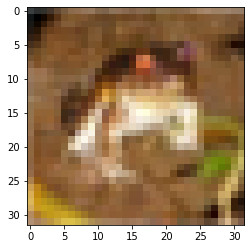

In [14]:
# 显示第一张图，此时图像size(32, 32)
plt.imshow(imgage0)
plt.show()

In [15]:
# 调整图像大小为(224, 224)，使用线性差值填充
image0_ = transforms.Resize((224, 224))(imgage0)
type(image0_), image0_.size

(PIL.Image.Image, (224, 224))

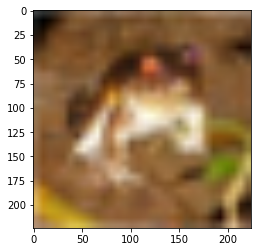

In [16]:
plt.imshow(image0_)
plt.show()

## 1.2 增加数据增强

In [53]:
# 训练集3个通道的均值
channel_mean = train_data.data.reshape((-1, 3)).mean(axis=0) / 255.0
# 训练集3个通道的标准差
channel_std = train_data.data.reshape((-1, 3)).std(axis=0) / 255.0

train_transform = transforms.Compose([
    # 重置大小
    transforms.Resize((224, 224)), 
     # 在随机位置重新裁剪图片                                   
    transforms.RandomCrop(size=(224, 224), padding=4),   
    # 默认以一半的概率水平（左右）翻转图像                              
    transforms.RandomHorizontalFlip(),    
    # 调整图像亮度、对比度、饱和度、色相
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.ToTensor(),
    # 对每个通道标准化
    transforms.Normalize(channel_mean, channel_std),   
    ])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize(channel_mean, channel_std),
    ])

In [54]:
channel_mean, channel_std

(array([0.49139968, 0.48215841, 0.44653091]),
 array([0.24703223, 0.24348513, 0.26158784]))

## 1.3 重新加载

In [55]:
# 数据加载
train_data = CIFAR10(root='./root/cifar10',
                     train=True,
                     transform=train_transform,
                     download=False)
test_data = CIFAR10(root='./root/cifar10',
                    train=False,
                    transform=test_transform,
                    download=False)

## 1.4 分批打包数据集

In [56]:
# 超参数
BATCH_SIZE = 128

train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          num_workers=2,
                          shuffle=True)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE)

# 2 GoogleNet

## 2.1  建模
### 2.1.1 加载GoogleNet预训练模型

In [71]:
# pretrained 如果为真，则返回在ImageNet上预训练的模型
net_model = googlenet(pretrained=True)

In [72]:
# 可知在Googlenet只有一层全连接层
print(net_model.fc)

Linear(in_features=1024, out_features=1000, bias=True)


### 2.1.2 固定卷积层

In [73]:
# for param in net_model.parameters():
#     print(type(param))
#     print(param.requires_grad)
#     break

In [74]:
# i = 0
# for param in net_model.parameters():
#     param.requires_grad = False
#     i += 1
# print(f'{i} 个参数已全部固定')

In [75]:
# for param in net_model.parameters():
#     print(type(param))
#     print(param.requires_grad)
#     break

可以看到参数已固定成功。

### 2.1.3 修改全连接层

`nn.Linear(in_features: int, out_features: int, bias: bool = True) -> None``

In [76]:
net_model.fc = nn.Linear(1024, 10, bias=True)

In [77]:
net_model.fc

## 2.2  编译模型

In [78]:
# 超参数 学习率
LR = 1e-4

# 损失函数
criterion = nn.CrossEntropyLoss()
# 优化器中只添加fc层的参数
optimizer = optim.Adam(net_model.parameters(), lr=LR, weight_decay=0.)
# 定义device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net_model.to(device)
print(device)

cuda:0


## 2.3  训练

In [79]:
for t in train_loader:
    print(type(t))
    print(len(t))
    print(type(t[0]), type(t[1]))
    print(t[0].shape, t[1].shape)
    break

<class 'list'>
2
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([128, 3, 224, 224]) torch.Size([128])


## 2.4 训练模型

### 2.4.1 循环训练

In [80]:
EPOCH = 10

costs = []
train_accs = []
epoch_bar = trange(EPOCH)
early_stop = 0
min_loss = np.inf

for epoch in epoch_bar:
    epoch_bar.set_description("epoch:{}".format(epoch))
    start = time.time()
    losses = []
    correct, total = 0, 0
    for i, data in enumerate(train_loader):
        feats, labels = data
        feats, labels = feats.to(device), labels.to(device)
        # 前向传播 等价于net_model(feats)
        outputs = net_model.forward(feats)
        # 计算损失函数
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        # 清空梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()
        # 预测
        _, pred = torch.max(outputs.data, 1)
        # 判断预测与实际是否一致
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    # 计算每个epoch的准确率
    train_accs.append(correct / total)
    batch_mean_loss = np.mean(losses)
    costs.append(batch_mean_loss)
    if batch_mean_loss < min_loss:
        min_loss = batch_mean_loss
        early_stop = 0
    else:
        early_stop += 1
        if early_stop == 10:
            print(
                f"epoch:{epoch} loss:{batch_mean_loss} train_accuracy:{train_accs[-1]} 连续{early_stop}个Epoch未减小，停止循环"
            )
            break
#     if epoch % 5 == 0:
#         print("epoch:{} loss:{:.4f} train_accuracy:{} 耗时:{:.1f}s/epoch".format(epoch, batch_mean_loss, train_accs[-1], time.time() - start))
    print("epoch:{} loss:{:.4f} train_accuracy:{} 耗时:{:.1f}s/epoch".format(
        epoch, batch_mean_loss, train_accs[-1],
        time.time() - start))

epoch:0 loss:0.7081 train_accuracy:0.83538 耗时:168.1s/epoch
epoch:1 loss:0.1762 train_accuracy:0.9415 耗时:167.4s/epoch
epoch:2 loss:0.1107 train_accuracy:0.96306 耗时:167.1s/epoch
epoch:3 loss:0.0780 train_accuracy:0.9741 耗时:169.5s/epoch
epoch:4 loss:0.0572 train_accuracy:0.9806 耗时:168.6s/epoch
epoch:5 loss:0.0431 train_accuracy:0.98536 耗时:168.3s/epoch
epoch:6 loss:0.0365 train_accuracy:0.98764 耗时:167.5s/epoch
epoch:7 loss:0.0278 train_accuracy:0.9909 耗时:168.0s/epoch
epoch:8 loss:0.0235 train_accuracy:0.99244 耗时:168.7s/epoch
epoch:9 loss:0.0249 train_accuracy:0.99144 耗时:168.7s/epoch



### 2.4.2 Train Loss可视化

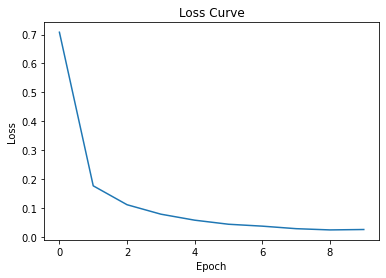

In [81]:
plt.plot(range(len(costs)), costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss Curve")
plt.show()

### 2.4.3 Train Accuracy 可视化

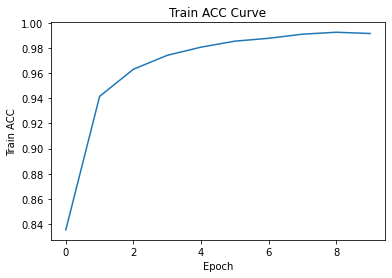

In [82]:
plt.plot(range(len(train_accs)), train_accs)
plt.xlabel('Epoch')
plt.ylabel('Train ACC')
plt.title("Train ACC Curve")
plt.show()

# 3 保存模型

In [83]:
torch.save(net_model, "./cifar10_googlenet_1.pt")
# 加载模型的命令
# model = torch.load("cifar10_googlenet.pt")

# 4 测试集评估模型

In [84]:
net_model.eval()

with torch.no_grad():
    correct, total = 0, 0
    for data in test_loader:
        feats, labels = data
        feats, labels = feats.to(device), labels.to(device)
        # 前向传播
        out = net_model(feats)
        # 预测
        _, pred = torch.max(out.data, 1)
        # 判断预测与实际是否一致
        total += labels.size(0)
        correct += (pred == labels).sum().item()
        
    print("在测试集10000张图像上的准确率:{:.2f}%".format(correct / total *100))

在测试集10000张图像上的准确率:95.11%


# 5总结

---
第一次使用预训练的模型，踩了不少雷。
1. 按通道归一化时，对于如何获得各通道的均值和标准差，一开始陷入了误区:
    - 最开始我用`train_data.data.mean(1).mean(1).mean(1)` 连续3次水平求均值，由于都是加减操作，因此可以得到3个通道的正确均值；
    - 而`train_data.data.std(1).std(1).std(1)`，因为有平方和开根号的缘故，所以连续用std得到的结果是不对的，导致不管如何训练，准确率只在80%左右浮动；
    - 网上搜到的大多用的是for循环逐个计算，但觉得不够优雅，研究到最后才想到明明可以用数组的`reshape((-1, 3))`，再使用mean(axis=1)和std(axis=1)就能直接计算得到均值和标准差；
2. 在模型训练时，踩的雷：
    - 我用了ResNet18、ResNet50、VGG16、GoogleNet四种模型，得到的准确率最高只到87.03%；一直在调整超参数，但调了3天LR、EPOCH、BATCH_SIZE，无果，循环到140多次，仍然只能得到85%左右的准确率；
    - 几近放弃的时候，才意识到，原始数据集图像尺寸为(32,32)的RGB图像，那预训练模型训练时所使用的图像尺寸是多少呢？查了资料，才发现，AlexNet、VGGNet、GooleNet默认的图像输入大小为(224, 224)的RGB图像，Resize图像尺寸后再训练，果然准确率提升了；
3. 最终选用GoogleNet进行训练，Resize图像尺寸为(224, 224)后：
    - EPOCH=65，测试集准确率为96.05%；
    - EPOCH=5，测试集准确率为95.16%；
4. GooleNet，重置尺寸为(224, 224)，我试了固定卷积层参数，修改全连接层为2层，仅训练全连接层的参数，但10轮EPOCH后，训练集和测试集的准确率仅80%左右；
5. 当我取消对卷积层参数的固定操作，输出层1000个点的输出，同样EPOCH=10，测试集准确率恢复为95.11%；
6. GoogleNet原始全链接层的默认输出结点数为1000，关于输出层的结点数是否需要修改：
    - 当我取消对卷积层参数的固定操作，输出层保留1000个点的输出，EPOCH=10，测试集准确率为95.11%；
    - 输出结点我修改成10后，同样EPOCH=10，测试集准确率是95.79%，可见最后一个结点数不修改，影响不大，修改后会更准确一些。

---
这次的Action，让我对经典的6种神经网络模型(LeNeT-5、AlexNet、DenseNet、VGGNet、GoogLeNet、ResNet)的理解又加深了；虽然都有全局的AdaptiveAvgPool2d，AlexNet用(32,32)的图像尺寸做输入，但建模时，因为图像过小，触发异常：`Given input size: (256x1x1). Calculated output size: (256x0x0). Output size is too small`;VGGNet、GoogLeNet、ResNet可以使用(32, 32)尺寸的图像作为输入，所以不会报错，但预训练时，准确率不高。所以，图像太小时，最好还是在模型外Resize下。